In [1]:
# %pip install pandas
# %pip install matplotlib
# %pip install scipy
# %pip install seaborn
# %pip install numpy

In [2]:
import pandas
import matplotlib.pyplot
import seaborn
import numpy

In [3]:
survey = pandas.read_csv('../data/Students Perceptions of AI in Education/Survey.csv')
survey.head()

,ID,Q1.AI_knowledge,Q2.AI_sources,Q2#1.Internet,Q2#2.Books/Papers,Q2#3.Social_media,Q2#4.Discussions,Q2#5.NotInformed,Q3#1.AI_dehumanization,Q3#2.Job_replacement,...,Q7.Utility_grade,Q8.Advantage_teaching,Q9.Advantage_learning,Q10.Advantage_evaluation,Q11.Disadvantage_educational_process,Q12.Gender,Q13.Year_of_study,Q14.Major,Q15.Passed_exams,Q16.GPA
0,1,8,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,1,2,...,9,3,1,2,3,1,2,2,1,9.2
1,2,7,Internet;Social media,1,0,1,0,0,2,3,...,6,2,2,1,2,2,2,2,1,7.7
2,3,5,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,2,1,...,6,3,3,3,4,2,2,2,0,7.2
3,4,5,Internet;Social media,1,0,1,0,0,4,4,...,9,1,2,2,3,1,2,2,1,8.2
4,5,4,Internet,1,0,0,0,0,1,2,...,8,3,2,3,4,1,2,2,1,7.7


In [4]:
def generate_distplot_numeric( data, unique_values, title = "" ):
    plot = seaborn.displot( data, bins = unique_values, kde = True )

    bin_edges = numpy.linspace( data.min(), data.max(), unique_values + 1 )
    tick_positions = ( bin_edges[:-1] + bin_edges[1:] ) / 2
    for ax in plot.axes.flat:
        ax.set_xticks( tick_positions )
        ax.set_xticklabels( range( 1, unique_values + 1 ) )
        ax.set_xlim( bin_edges[0], bin_edges[-1] )

    matplotlib.pyplot.title( title )

    print( data.describe() )

    matplotlib.pyplot.show()

In [5]:
def generate_distplot_text( data, labels, unique_values, title = "" ):
    plot = seaborn.displot( data, bins = unique_values, kde = True )

    bin_edges = numpy.linspace( data.min(), data.max(), unique_values + 1 )
    tick_positions = ( bin_edges[:-1] + bin_edges[1:] ) / 2
    for ax in plot.axes.flat:
        ax.set_xticks( tick_positions )
        ax.set_xticklabels( labels )
        ax.set_xlim( bin_edges[0], bin_edges[-1] )

    matplotlib.pyplot.title( title )

    matplotlib.pyplot.xticks( rotation = 45, ha = 'right' )

    print( data.describe() )

    matplotlib.pyplot.show()

In [6]:
def generate_barplot( data, title = "" ):
    split_responses = [ response.split(';') for response in data ]
    counter = {}
    for response in split_responses:
        for choice in response:
            if choice in counter:
                counter[ choice ] += 1
            else:
                counter[ choice ] = 1

    seaborn.barplot(
        pandas.DataFrame( list( counter.items() ), columns = ['Choice', 'Count'] ),
        y = 'Choice',
        x = 'Count'
    )

    matplotlib.pyplot.title( title )

    matplotlib.pyplot.show()

**Question 1:** On a scale of 1 to 10, how informed do you think you are about the concept of artificial intelligence? (1-not informed at all, 10-extremely informed)

count    91.000000
mean      5.912088
std       1.970044
min       1.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      10.000000
Name: Q1.AI_knowledge, dtype: float64


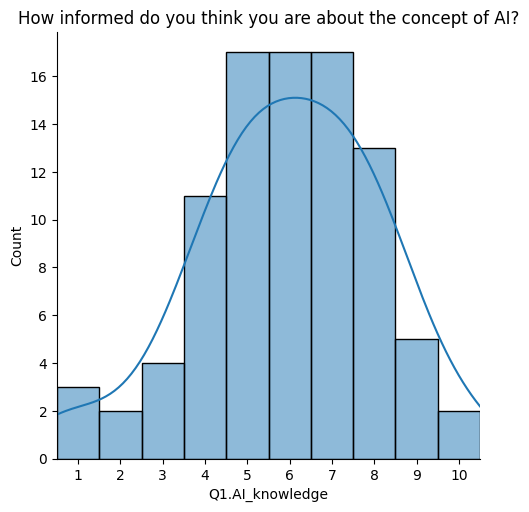

In [7]:
generate_distplot_numeric( survey['Q1.AI_knowledge'], 10, "How informed do you think you are about the concept of AI?" )

**Question 2:** What sources do you use to learn about the concept of artificial intelligence?

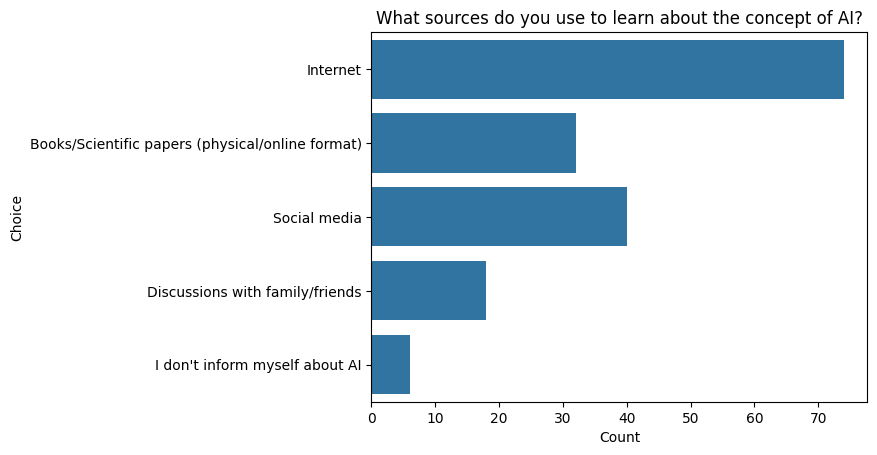

In [8]:
generate_barplot( survey['Q2.AI_sources'], "What sources do you use to learn about the concept of AI?" )

**Question 3:** Express your agreement or disagreement with the following statements: (1: Strongly Disagree, 2: Partially Disagree, 3: Neutral, 4: Partially Agree, 5: Fully Agree)

1) AI encourages dehumanization
2) Robots will replace people at work
3) AI helps to solve many problems in society (education, agriculture, medicine), managing time and dangerous situations more efficiently
4) AI will rule society

count    91.000000
mean      2.516484
std       1.167739
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: Q3#1.AI_dehumanization, dtype: float64


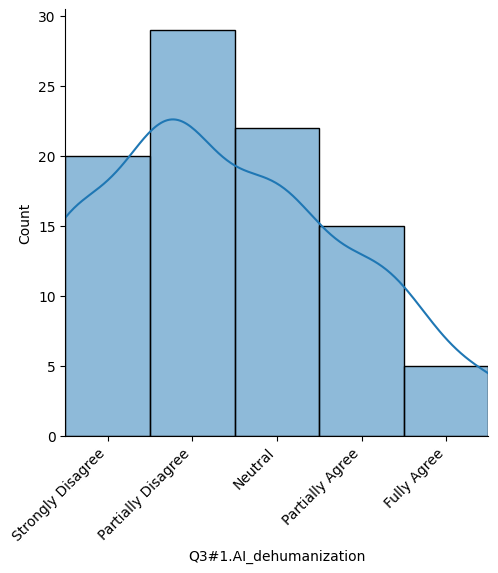

count    91.000000
mean      3.197802
std       1.213075
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Q3#2.Job_replacement, dtype: float64


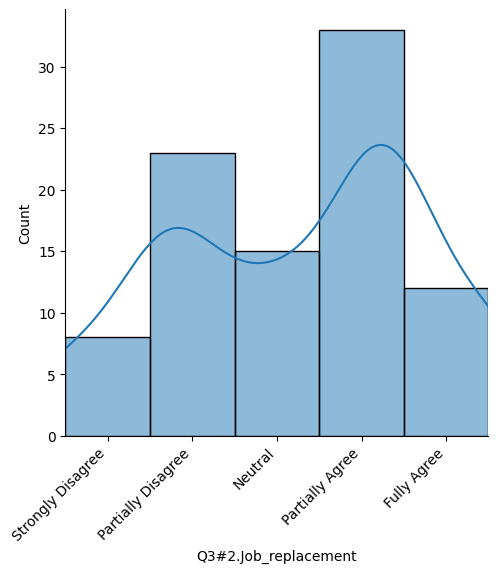

count    91.000000
mean      4.197802
std       1.013462
min       1.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Q3#3.Problem_solving, dtype: float64


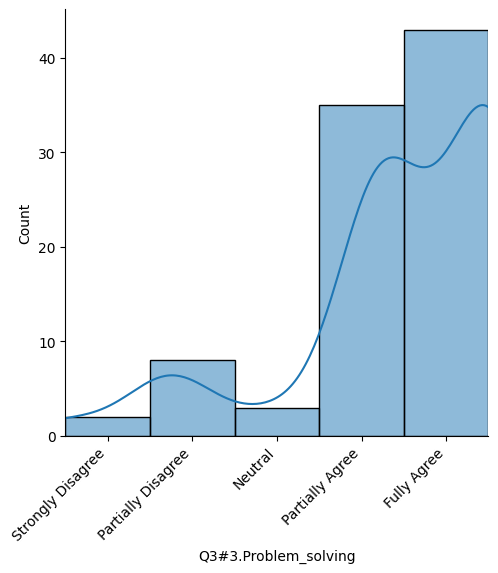

count    91.000000
mean      2.428571
std       1.203170
min       1.000000
25%       1.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: Q3#4.AI_rulling_society, dtype: float64


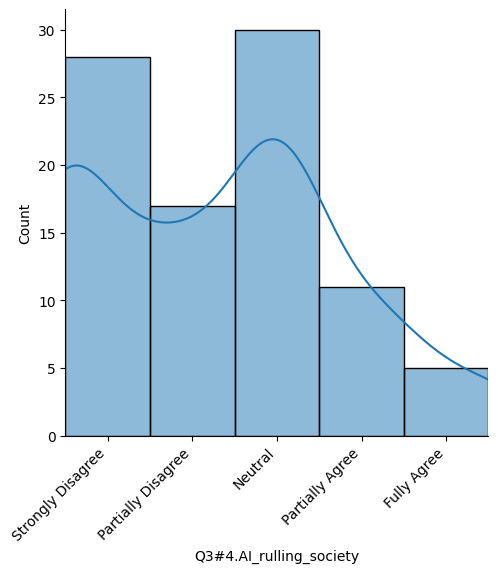

In [9]:
possible_values = ["Strongly Disagree", "Partially Disagree", "Neutral", "Partially Agree", "Fully Agree"]

for col in [ col for col in survey.columns if col[0:2] == "Q3" ]:
    generate_distplot_text( survey[col], possible_values, 5 )

**Question 4:** Express your agreement or disagreement with the following statements: (1: Strongly Disagree, 2: Partially Disagree, 3: Neutral, 4: Partially Agree, 5: Fully Agree)

1) Machinery using AI is very expensive and resource intensive to build and maintain
2) AI will lead to a global economic crisis
3) AI will help global economic growth
4) AI leads to job losses

count    91.000000
mean      3.571429
std       0.920662
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Q4#1.AI_costly, dtype: float64


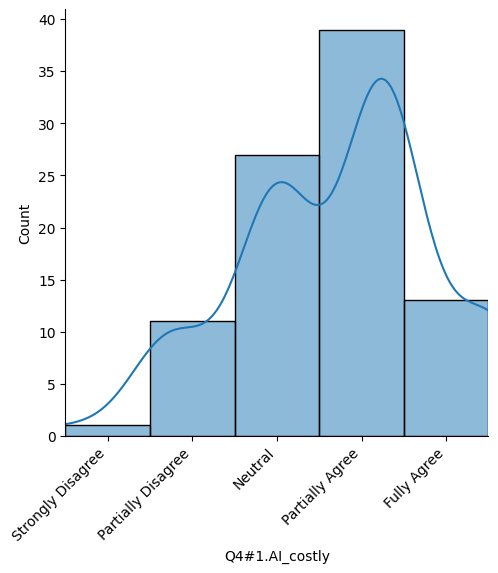

count    91.000000
mean      2.560440
std       1.056291
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: Q4#2.Economic_crisis, dtype: float64


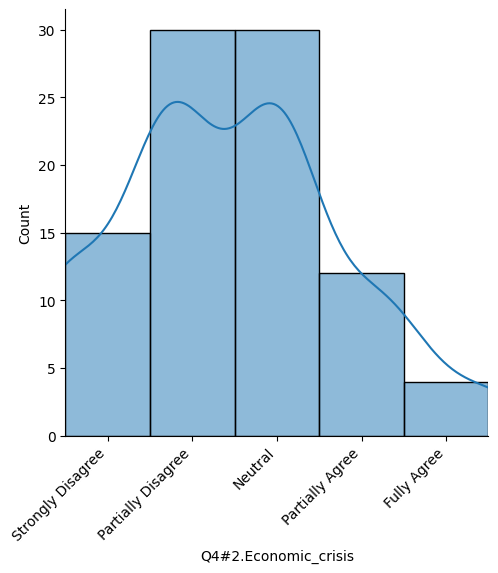

count    91.000000
mean      3.659341
std       0.872032
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Q4#3.Economic_growth, dtype: float64


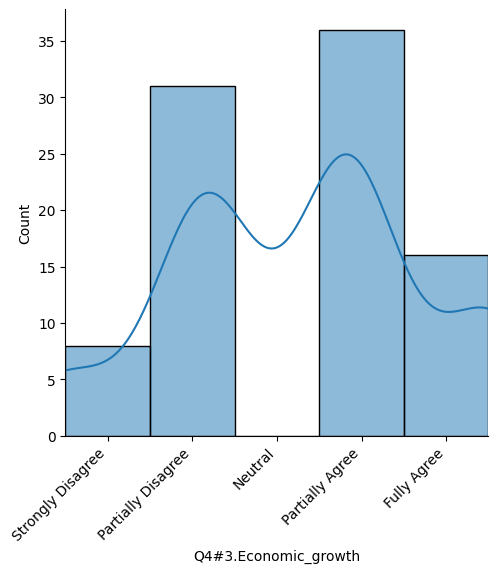

count    91.000000
mean      3.395604
std       1.073718
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Q4#4.Job_loss, dtype: float64


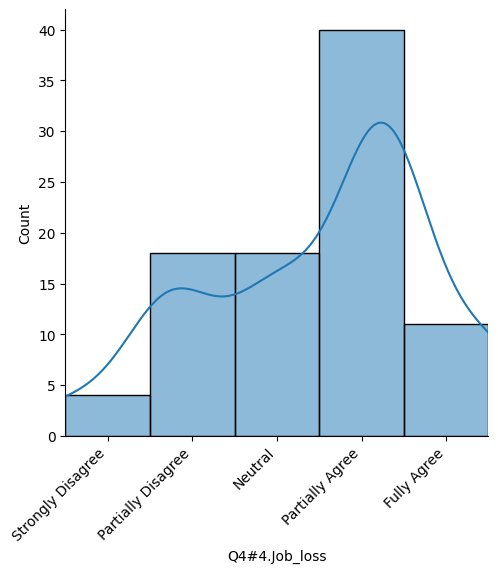

In [10]:
possible_values = ["Strongly Disagree", "Partially Disagree", "Neutral", "Partially Agree", "Fully Agree"]

for col in [ col for col in survey.columns if col[0:2] == "Q4" ]:
    generate_distplot_text( survey[col], possible_values, 5 )

**Question 5:** When you think about AI do you feel:

1) Curiosity
2) Fear
3) Indifference
4) Trust

count    91.000000
mean      1.582418
std       0.966850
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: Q5.Feelings, dtype: float64


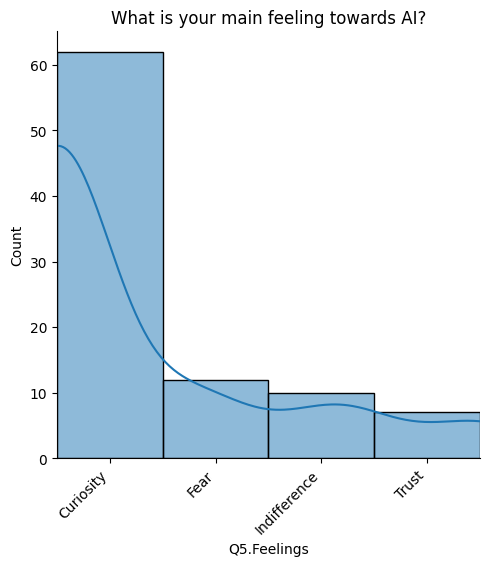

In [11]:
possible_values = ["Curiosity", "Fear", "Indifference", "Trust"]

generate_distplot_text( survey['Q5.Feelings'], possible_values, 4, "What is your main feeling towards AI?" )

**Question 6:** In which areas do you think AI would have a big impact?

1. Education
1. Medicine
1. Agriculture
1. Constructions
1. Marketing
1. Public administration
1. Art

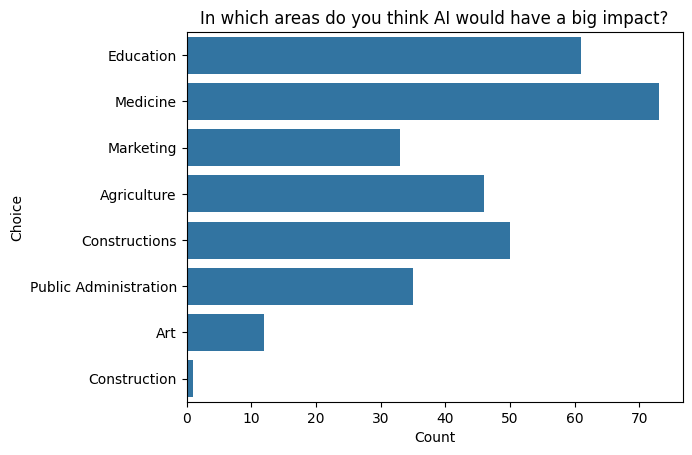

In [12]:
generate_barplot( survey['Q6.Domains'], "In which areas do you think AI would have a big impact?" )

**Question 7:** On a scale of 1 to 10, how useful do you think AI would be in the educational process? (1- not useful at all, 10-extremely useful)

count    91.000000
mean      7.439560
std       2.161321
min       2.000000
25%       6.000000
50%       8.000000
75%       9.000000
max      10.000000
Name: Q7.Utility_grade, dtype: float64


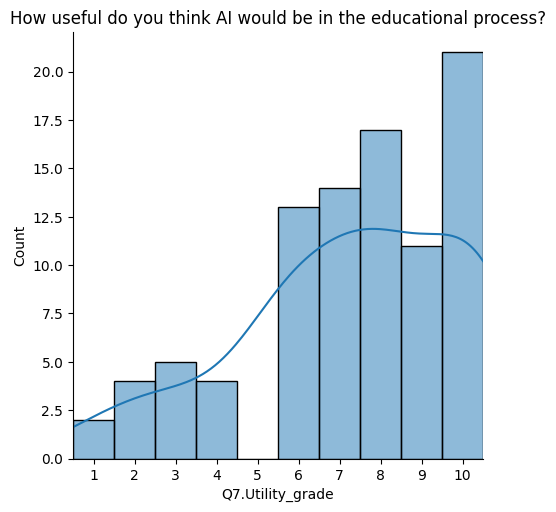

In [13]:
generate_distplot_numeric( survey['Q7.Utility_grade'], 10, "How useful do you think AI would be in the educational process?" )

**Question 8:** What do you think is the main advantage that AI would have in the teaching process?

1. Teachers can be assisted by a virtual assistant for teaching lessons and answering students' questions immediately
1. More efficient management of teachers' time
1. More interactive and engaging lessons for students
1. Other

count    91.000000
mean      1.923077
std       0.884820
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: Q8.Advantage_teaching, dtype: float64


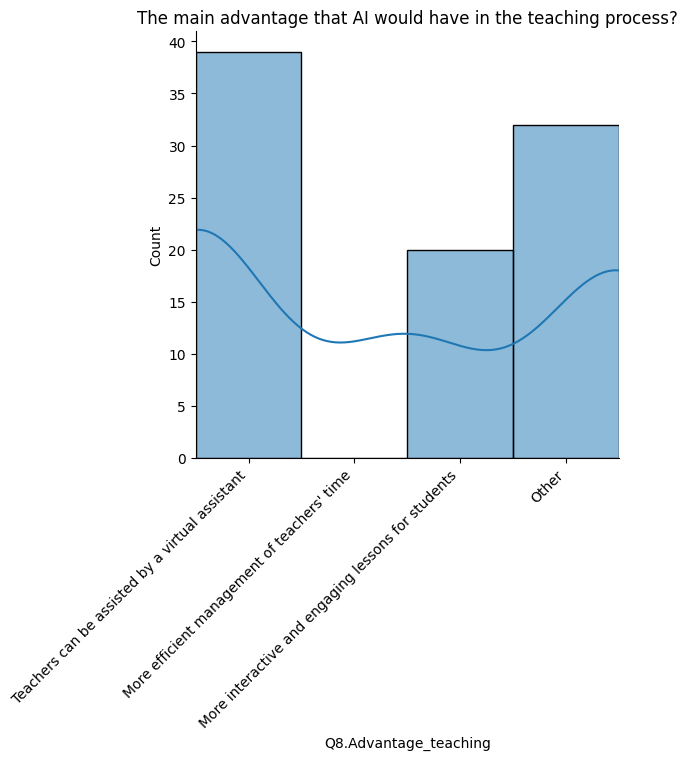

In [14]:
possible_values = [
    "Teachers can be assisted by a virtual assistant",
    "More efficient management of teachers' time",
    "More interactive and engaging lessons for students",
    "Other"
]

generate_distplot_text( survey['Q8.Advantage_teaching'], possible_values, 4, "The main advantage that AI would have in the teaching process?" )

**Question 9:** What do you think is the main advantage that AI would have in the learning process?

1. Personalized lessons according to students' needs
1. Universal access for all students eager to learn, including those with special needs
1. More interactive and engaging lessons for students
1. Other

count    91.000000
mean      1.879121
std       0.680444
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: Q9.Advantage_learning, dtype: float64


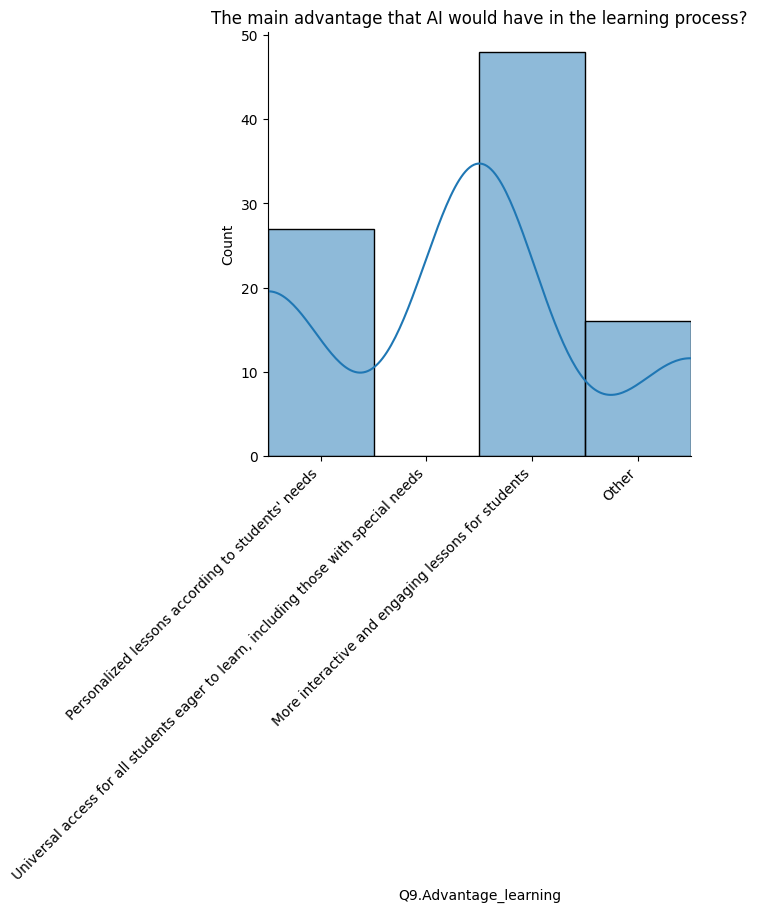

In [15]:
possible_values = [
    "Personalized lessons according to students' needs",
    "Universal access for all students eager to learn, including those with special needs",
    "More interactive and engaging lessons for students",
    "Other"
]

generate_distplot_text( survey['Q9.Advantage_learning'], possible_values, 4, "The main advantage that AI would have in the learning process?" )

**Question 10:** What do you think is the main advantage that AI would have in the evaluation process?

1. Automation of exam grading
1. Fewer errors in grading system
1. Constant feedback from virtual assistants for each student
1. Other

count    91.000000
mean      2.252747
std       0.824532
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: Q10.Advantage_evaluation , dtype: float64


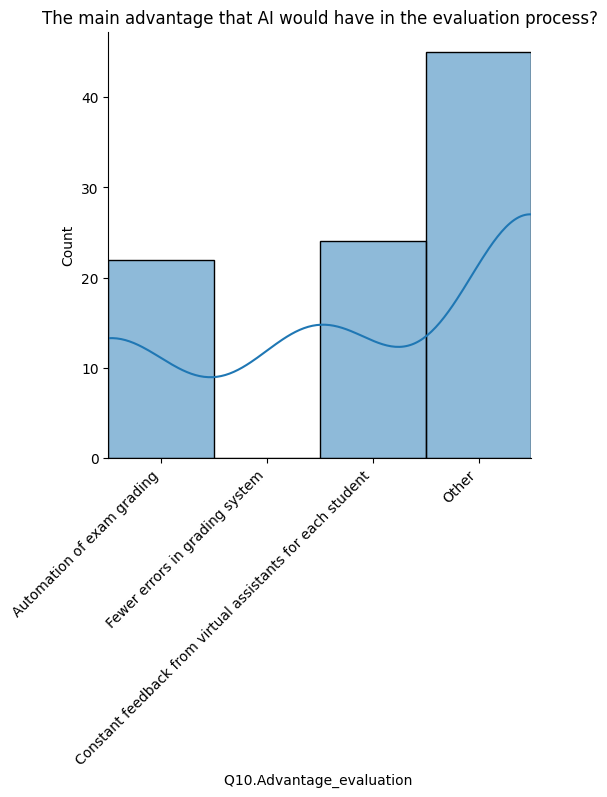

In [16]:
possible_values = [
    "Automation of exam grading",
    "Fewer errors in grading system",
    "Constant feedback from virtual assistants for each student",
    "Other"
]

generate_distplot_text( survey['Q10.Advantage_evaluation '], possible_values, 4, "The main advantage that AI would have in the evaluation process?" )

**Question 11:** What do you think is the main disadvantage that AI would have in the educational process?

1. Lack of a relationship between students and teacher
1. Internet addiction
1. Rarer interactions between students and teachers
1. Loss of information caused by possible system failure

count    91.000000
mean      2.098901
std       1.033387
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: Q11.Disadvantage_educational_process, dtype: float64


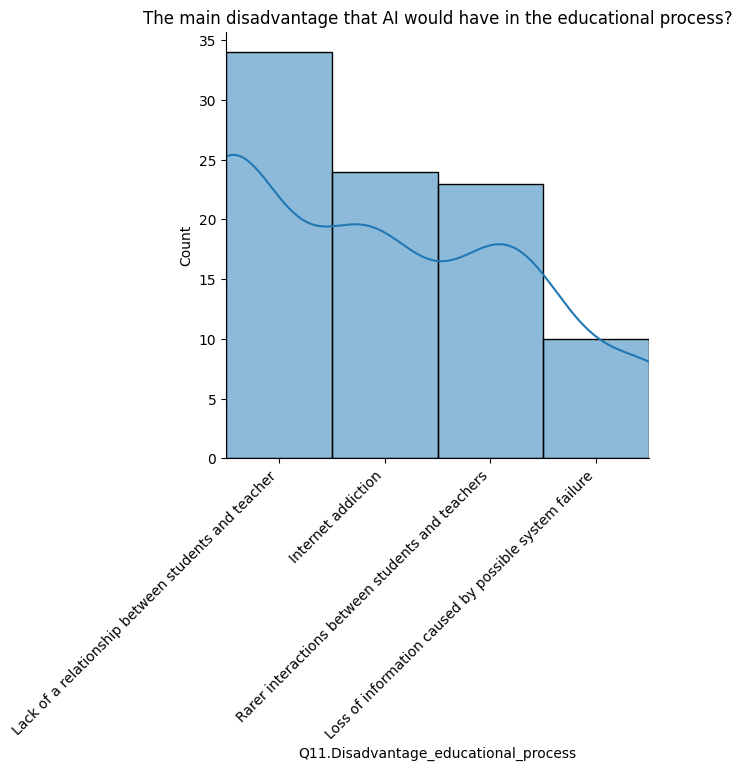

In [17]:
possible_values = [
    "Lack of a relationship between students and teacher",
    "Internet addiction",
    "Rarer interactions between students and teachers",
    "Loss of information caused by possible system failure"
]

generate_distplot_text( survey['Q11.Disadvantage_educational_process'], possible_values, 4, "The main disadvantage that AI would have in the educational process?" )

**Question 12:** What is your gender?

1. Female
1. Male

count    91.000000
mean      1.351648
std       0.480130
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Q12.Gender, dtype: float64


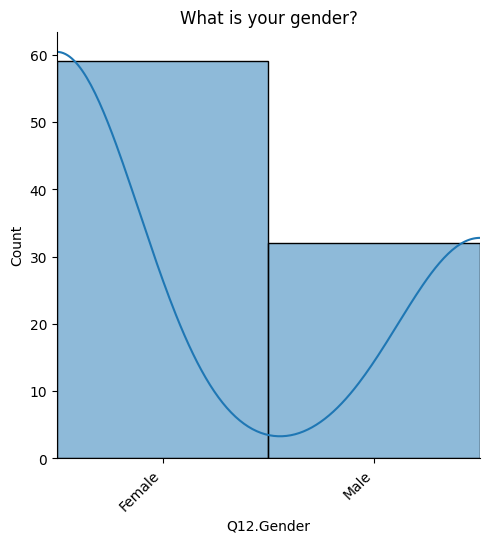

In [18]:
generate_distplot_text( survey['Q12.Gender'], ["Female", "Male"], 2, "What is your gender?" )

**Question 13:** What is your year of study?

1. Year 2
1. Year 3

count    91.000000
mean      1.626374
std       0.486446
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       2.000000
Name: Q13.Year_of_study, dtype: float64


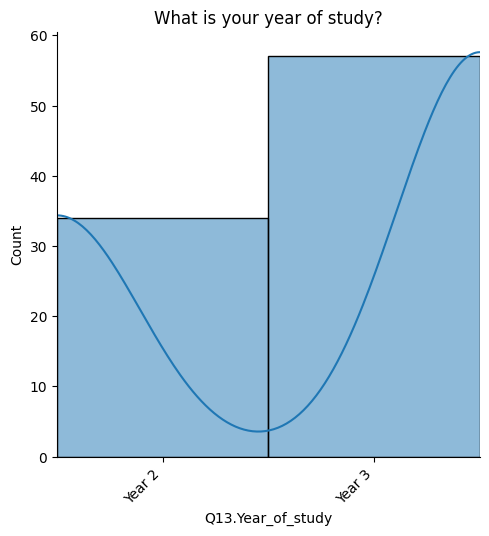

In [19]:
generate_distplot_text( survey['Q13.Year_of_study'], ["Year 2", "Year 3"], 2, "What is your year of study?" )

**Question 14:** What is your major?

1. Economic Cybernetics
1. Statistics and Economic Forecasting
1. Economic Informatics

count    91.000000
mean      1.923077
std       0.763483
min       1.000000
25%       1.000000
50%       2.000000
75%       2.500000
max       3.000000
Name: Q14.Major, dtype: float64


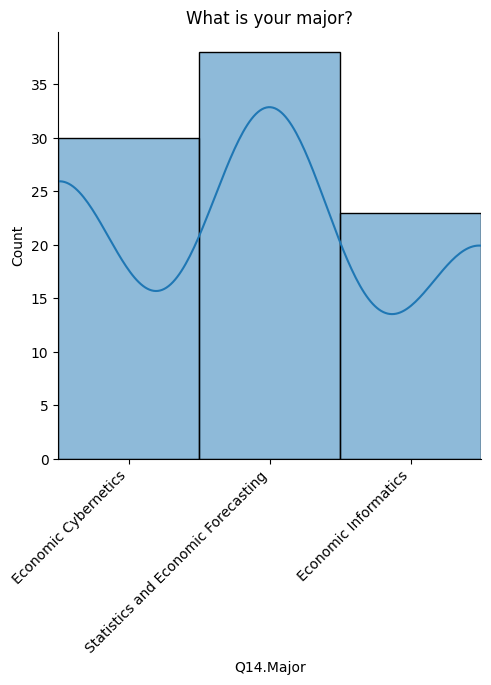

In [20]:
possible_values = [
    "Economic Cybernetics",
    "Statistics and Economic Forecasting",
    "Economic Informatics"
]

generate_distplot_text( survey['Q14.Major'], possible_values, 3, "What is your major?" )

**Question 15:** Did you pass all your exams?

1. Yes
1. No

count    91.000000
mean      0.747253
std       0.436995
min       0.000000
25%       0.500000
50%       1.000000
75%       1.000000
max       1.000000
Name: Q15.Passed_exams, dtype: float64


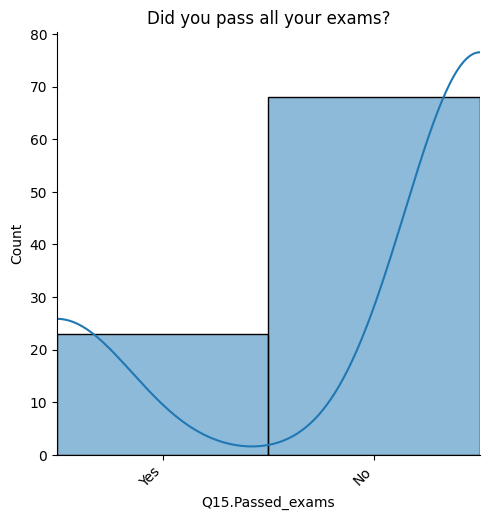

In [21]:
generate_distplot_text( survey['Q15.Passed_exams'], ["Yes", "No"], 2, "Did you pass all your exams?" )

**Question 16:** What is your GPA for your last year of study? (Note that grades are from 1 to 10 in Romania)

1. 5.0-5.4
1. 5.5-5.9
1. 6.0-6.4
1. 6.5-6.9
1. 7.0-7.4
1. 7.5-7.9
1. 8.0-8.4
1. 8.5-8.9
1. 9.0-9.4
1. 9.5-10

count    91.000000
mean      7.798901
std       0.975306
min       5.200000
25%       7.200000
50%       7.700000
75%       8.700000
max       9.700000
Name: Q16.GPA, dtype: float64


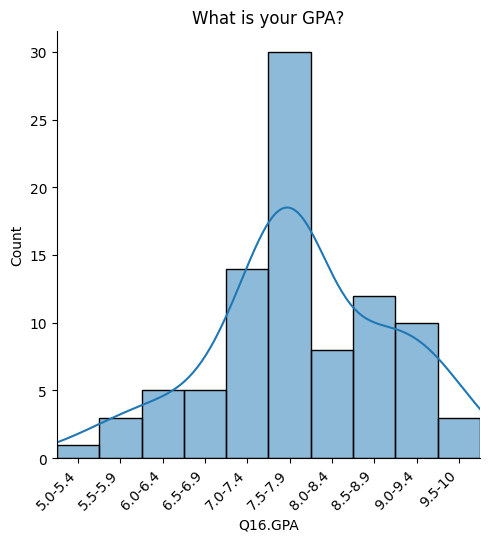

In [22]:
possible_values = [
    "5.0-5.4",
    "5.5-5.9",
    "6.0-6.4",
    "6.5-6.9",
    "7.0-7.4",
    "7.5-7.9",
    "8.0-8.4",
    "8.5-8.9",
    "9.0-9.4",
    "9.5-10"
]

generate_distplot_text( survey['Q16.GPA'], possible_values, 10, "What is your GPA?" )